In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplcyberpunk
plt.style.use('cyberpunk')

In [12]:
references_url1 = "https://raw.githubusercontent.com/trickest/cve/main/references.txt"
response = requests.get(url=references_url1)
data = response.text
array = np.genfromtxt(data.splitlines(), delimiter=' - ', dtype=None,encoding=None)
df = pd.DataFrame(array)
df.columns = ["CVE_ID", "URL"]

In [13]:
references_url2 = "https://raw.githubusercontent.com/trickest/cve/main/github.txt"
response = requests.get(url=references_url2)
github = response.text
array = np.genfromtxt(github.splitlines(), delimiter=' - ', dtype=None, encoding=None)
df1 = pd.DataFrame(array)
df1.columns = ["CVE_ID", "URL"]

In [14]:
df_all_rows = pd.concat([df, df1], ignore_index=True)
df_all_rows.to_csv('github_references.csv', index=False)

In [15]:
dataframe = pd.read_csv('github_references.csv')
dataframe

,CVE_ID,URL
0,CVE-1999-0095,http://seclists.org/fulldisclosure/2019/Jun/16
1,CVE-1999-0145,http://seclists.org/fulldisclosure/2019/Jun/16
2,CVE-1999-0225,http://www.nai.com/nai_labs/asp_set/advisory/2...
3,CVE-1999-0247,http://www.nai.com/nai_labs/asp_set/advisory/1...
4,CVE-1999-0298,http://www.nai.com/nai_labs/asp_set/advisory/0...
...,...,...
121221,CVE-2121-44228,https://github.com/nomi-sec/PoC-in-GitHub
121222,CVE-2190-17026,https://github.com/ARPSyndicate/cvemon
121223,CVE-2190-17026,https://github.com/maxpl0it/CVE-2019-17026-Exp...
121224,CVE-3005-0001,https://github.com/ARPSyndicate/cvemon


In [16]:
d =pd.Series(dataframe['CVE_ID'])

dataframe['CVE_ID'] =d.str.split("-", expand =True)[0]
dataframe['year'] =d.str.split("-", expand =True)[1]


In [17]:
dataframe = dataframe.drop(['CVE_ID'],axis=1)

In [18]:
dataframe['year'] = dataframe['year'].astype('int64')

dataframe = dataframe.drop(dataframe[dataframe['year'] > 2022].index)
dataframe = dataframe.drop(dataframe[dataframe['year'] == 0].index)
dataframe

,URL,year
0,http://seclists.org/fulldisclosure/2019/Jun/16,1999
1,http://seclists.org/fulldisclosure/2019/Jun/16,1999
2,http://www.nai.com/nai_labs/asp_set/advisory/2...,1999
3,http://www.nai.com/nai_labs/asp_set/advisory/1...,1999
4,http://www.nai.com/nai_labs/asp_set/advisory/0...,1999
...,...,...
121214,https://github.com/nomi-sec/PoC-in-GitHub,2022
121215,https://github.com/ARPSyndicate/cvemon,2022
121216,https://github.com/W01fh4cker/Serein,2022
121217,https://github.com/ARPSyndicate/cvemon,2022


In [19]:
dataframe['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

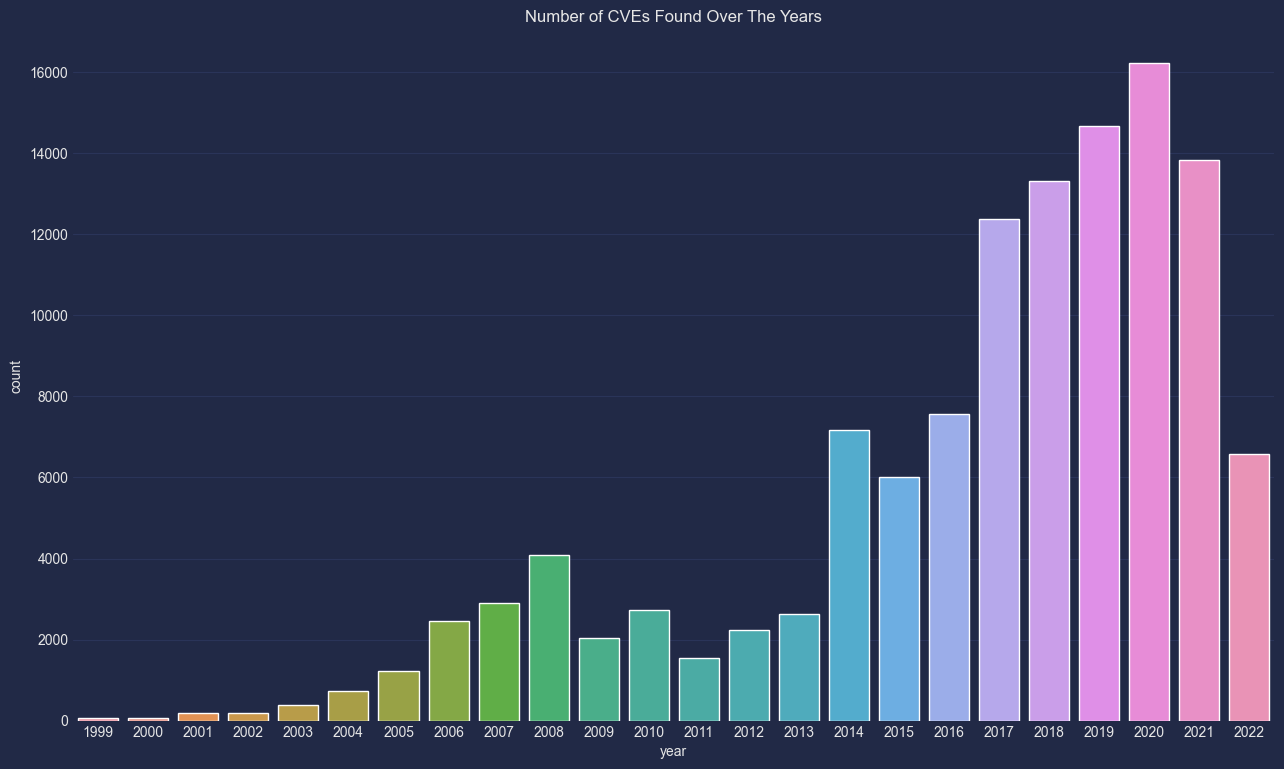

In [20]:
sns.catplot(x='year', data=dataframe, kind='count').set(title='Number of CVEs Found Over The Years')
plt.gcf().set_size_inches(15, 8)
plt.show()